# Ensemble Learning

## Introduction

Ensemble Learning is a way in which we use multiple models to obtain better predictive predictions.  
  
  
### Wisdom Of Crowd:

Suppose you pose a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert's answer. This is called *Wisdom of Crowd*. Similarly, if you aggregate the predictions of group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an *ensemle*; thus, this technique is called *Ensemble Learning*.  
  
  
  
Suppose you have a dataset with 10 instances and you have to perform classification task. As per current knowledge, **Which model will you use?**  
  
    
Most probably you'll pick the one who will give the highest accuracy on the Validation Dataset.  

Let's suppose we tried KNN, Logistic Regression and Decision Tree on the data, and the results are something like:  

> **KNN** misclassifies instance no. **1** & **7** & **9**.  
> 
> **Logistic Regression** misclassifies instance no. **2** & **3**.  
> 
> **Decision Tree** misclassifies instance no. **2** & **4**.  
> 
  
  
Applying **Wisdom of Crowd** here, we can see instance no. "9" is misclassified by KNN, but LR & DT classifies it correctly. So, if we combine the predictions and consider the majority one it will be classified correctly. Same goes for points 1, 7, 3 & 4. Notice here instance no. "2" still remains misclassified, leaving the ensemble model accuracy at 90%, which is a very better score, if we consider their individual scores(70%, 80%, 80%).


## Voting Classifiers

![](ensem1.png)

The above ensemble model is also called **"Voting Classifier"**, as the task performed is of classification and the prediction is made by majority votes. Surprising enough, this isn't the only case. This Voting Classifier often achieves a higher accuracy than the best classifier in the ensemble. In Fact, even if classifier is a *weak learner* (meaning it does only slightly better than random guessing), the ensemble can still be a *strong leanrner* (achieving high accuracy), provided there are a  sufficient number of weak learners and they are sufficiently diverse.  
  
  
  
> What do I mean by **sufficiently diverse** here?  
>   
>> Consider a case, where you make an ensemble, taking 5 or 7 models, and still there isn't any considerable boost in accuracy. What do you suppose the reason here can be?: A fair answer to this can be maybe they all are following the same "Learning regime".

***

>  
> #### Learning Regime
>
>
>> Learning Regime is the learning curve followed by the model. Say, if we train 2 same KNN models on same dataset. Both of the models will have same "learning regime".  
>>  
>> For Ensemble to work, the models should have different learning regimes, or else they'll produce same (correlated) errors, thus the voting will have no impact. So, for effective ensembling, the errors must be uncorrelated.  
>>   
>> 
>> The best way to know if the errors are correlated or not, is to have a look on accuracy of inidividual v/s ensemble model.
>> 
>> If $Accuracy_{individual} = Accuracy_{ensemble}$ #means Errors are **correlated**.
>> 
>> If $Accuracy_{individual} < Accuracy_{ensemble}$ #means Errors are **uncorrelated**.  
>>
>
> **So Is changing the model only way to change the learning curve?**  
>    
>> No, you can also change the value of hyperparameters (like value of K in KNN), to obtain different learning regimes. Or you can divide the data and pass it to different models, which will also alter the learning curve. 
> 

Now let's try out Voting Classifier through sklearn library.  
  
This time we'll use a very common dataset known as Moon Dataset : This is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles.  
  
  
To know more about moon dataset, visit : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

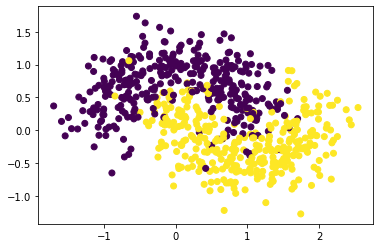

Training => X:(670, 2), y:(670,)
Testing => X:(330, 2), y:(330,)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Importing the data
X = np.load("./Data/Ensemble/X_data.npy")
y = np.load("./Data/Ensemble/Y_data.npy")

#Splitting Training & Validation Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Plotting the Data
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

#Shape of data
print(f"Training => X:{X_train.shape}, y:{y_train.shape}")
print(f"Testing => X:{X_test.shape}, y:{y_test.shape}")

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression() #Logistic Regression
svm = SVC() #SVM => Support Vector Machine
dt = DecisionTreeClassifier() #Decision Tree

voting_clf = VotingClassifier(estimators=[('lr', lr), ('svm', svm), ("dt", dt)])
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                             ('dt', DecisionTreeClassifier())])

In [3]:
from sklearn.metrics import accuracy_score

for classifier in (lr, svm, dt, voting_clf):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, "=>", accuracy_score(y_test, y_pred))

LogisticRegression => 0.8636363636363636
SVC => 0.9254545454545454
DecisionTreeClassifier => 0.906060606060606
VotingClassifier => 0.9424242424242424


There you have it! The Voting Classifier slightly outperforms all the individual classifiers.  

This is the benefit of Ensemble Learning. However the difference in this accuracy will increase with the increase in uncorrelation of the error of these models.  

Now as we've seen **Voting Classifier** (a famous technique for ensemble learning), let's have a look on different types of Ensemble Learning. These types differ on the technique they follow.
  
  
## Types of Ensemble Learning
  

1. Bagging & Pasting

2. Gradient Boosting & Adaptive Boosting

3. Stacking
  
  
  
  
### Bootstrap Aggregation [Bagging] & Pasting

One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use same training algorithm for every predictor and train them on different random subsets of the training set. Whem sampling is performed with replacement, this method is called ***Bagging***(short for Bootstrap Aggregation). And when sampling is performed without replacement, it is called ***Pasting***.  
  
  
  
In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.  

![](ensem2.png)

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the *statistical mode* (the prediction that is most occuring) for classification, or the *statistical mean* (average) for regression.  
  
  
You can train these different models in parallel systems, via different CPU Cores or even different servers. Similarly, predictions can be made in parallel as well. This is one of the reasons bagging and pasting are very popular methods: they scale very well.  
  
Now let's have a look on sklearn implementation of Bagging and Pasting

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


#Individual Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Individual Decision Tree Model:", accuracy_score(y_test,y_pred))


#Ensemble Classification model with Decision Tree as base estimator
bag_clf = BaggingClassifier(dt, n_estimators=10, max_samples=100, bootstrap=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Ensemble Decision Tree Model:",accuracy_score(y_test, y_pred))

Individual Decision Tree Model: 0.906060606060606
Ensemble Decision Tree Model: 0.9484848484848485


You can clearly observe the difference in their accuracies using this approach. This proves the effectiveness of Bagging. You can prepare a Pasting Model by setting "bootstrap" parameter of BaggingClassifier to "False", which means the replacement of instances is not allowed i.e. Pasting.  
  
  
  
  
Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with slightly higher bias than pasting; but the extra diversity also means that the predictors end up being less correlated, thus increasing ensembling efficiency. Overall, in simpler terms Bagging often results in better models, which exaplains why it is generally preferred over pasting.  
  
  
  
  
**Note :** The `BaggingClassifier` class supports sampling the features as well. Sampling is controlled by 2 hyperparameters: `max_features` and `bootstrap_features`. They allow random sampling of features for the model with or without repitition. Thus, each predictor can be trained on a random subset of the input features as well. Sampling feature results in even more predictor diversity, hence giving less correlation and making ensemble more effective.

#### Random Forests
It is a very famous and widely used Ensemble, which provides a considerable accuracy boost in many cases. Random Forest is an ensemble of Decision Trees, generally trained via the Bagging method (or sometimes pasting), typically with `max_samples` set to size of the training set. Instead of building a `BaggingClassifier` and passing it in a `DecisionTreeClassifier`(like we did above), We can instead use the `RandomForestClassifier` class, which is more convenient.

In [5]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9363636363636364


With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control ensemble itself.  
  
  
  
  
The Random Forest algorithm introduces extra randomness when growing trees, instead of searching for the very best feature when splitting a node, is searches for the best feature among a random subset of features.

### Boosting
As we saw Bagging, in which we train different models by changing the learning regime, and we can say these models have no connection with each other and each of them gives prediction according to their own. So we can do parallel training of different models here.  
  
But boosting works on a slightly different manner, it's basically training the second model on the errors of the first one and third for the errors of second and so on. So, it is a sequential training in which each model tries to correct its predecessor. There are many boosting methods available, but by far the most popular are **AdaBoost** (short for Adaptive Boosting) and **Gradient Boosting**. Let's start with AdaBooost first. 

#### AdaBoost
One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is technique used by AdaBoost.  
  
  
  
For example, when training an AdaBoost classifier, the algorithm first trains a base classifier (such as Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instances weights, and so on.

Consider the error equation :  

$\large{e = \sum_{i = 1}^n y_i - \hat{y}_i}$  

  
> For n = 100 :-  
> 
>> $e = (y_1 - \hat{y}_1) + (y_2 - \hat{y}_2) + \hspace{1mm}...\hspace{1mm} + \mathbf{6}(y_{26} - \hat{y}_{26}) + \hspace{1mm}...\hspace{1mm} + \mathbf{10} (y_{56} - \hat{y}_{56}) + \hspace{1mm}...\hspace{1mm}+(y_{100} - \hat{y}_{100})$  
  
  
Suppose my model was misclassifying instance no. **26** & **56**. So I can multiply these instances with some constants, so that my equation for the next model have some extra weight for these points, which means it will contain some bias for these instances, and try to focus on classifying them correctly. This is the base for Adaptive Boosting.  
  
  
Consider a Classification Dataset:



![ensemble.png](ensem3.png)

Now if we train an individual Decision Tree model, it's decision boundary will look something like this, and as we can see it misclassifies a lot of points.


![ensemble2.png](ensem4.png)

So, what we do in Adaptive Boosting is introduce some bias for the misclassified points, so our next model emphasize on them more which will somewhat enhance the decision boundary for our dataset.  
  
  
  
  
So, we multiply the terms of these points with some constant that can differ for each point as well, as we use more and more models. Finally, the algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found. To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights. The predicted class is the one that receives the majority of weighted votes.  
  
  
![ensemble3.png](ensem5.png)

Now, let's have a look on Scikit Learn Implementation of AdaBoost. Scikit-Learn uses a multiclass version of AdaBoost called ***SAMME*** [**S**tagewise **A**dditive **M**odeling using a **M**ulticlass **E**xponential loss function]. When there are just two classes (Binary Classification), SAMME is equivalent to AdaBoost. So let's compare the accuracies of individual decision tree and AdaBoost ensemble of Decision Trees.
The code below trains an AdaBoost Classifier based on 200 Decision Trees using Scikit-Learn's `AdaBoostClassifier` class.

In [6]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5)
ada_clf.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_ensemble = ada_clf.predict(X_test)
y_pred_dt = dt.predict(X_test)

print("Individual Decision Tree Accuracy", accuracy_score(y_pred_dt, y_test))
print("AdaBoost Ensemble Accuracy", accuracy_score(y_pred_ensemble, y_test))

Individual Decision Tree Accuracy 0.9121212121212121
AdaBoost Ensemble Accuracy 0.9424242424242424


As you can see the accuracy increased from 90% to 94%. As we performed Classification task using `AdaBoostClassifier`, regression tasks can also be performed using `AdaBoostRegressor`.



#### Gradient Boosting

Another very popular boosting algorithm is **Gradient Boosting**. Just like AdaBoost, Gradient Boosting works sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the *residual errors* made by the previous predictor. The concept of Gradient Boosting can be understood easily by taking an example.  
  
  
  
Consider the case of Linear Regression.  

> $e = y - \hat{y}$  
  
Let's take our I$^{st}$ model and put this equation.  

> $e_1 = y - \hat{y}_1$  
  
Suppose it returned some error $e_1$, so now we'll train our next model on this error like:  
  
> $e_2 = e_1 - \hat{e}_1\hspace{1.5cm}$ or we can say  
>   
> $e_2 = y - \hat{y}_1 - \hat{e}_1$  
  
Compare above equation with $e = y - \hat{y}$ , we can say  
  
> $\hat{y} = \hat{y}_1 + \hat{e}_1$  
  
For Mutiple Models:  

> $\hat{y} = \hat{y}_1 + \hat{e}_1 + \hat{e}_2 + \hat{e}_3 + \hat{e}_4 + ...$  
  
**Writing this programatically:**

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train, y_train)

e1 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train, e1)

e2 = e1 - tree_reg1.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train, e2)

y_pred_ensemble = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

Or the above same code, can be implemented using sklearn implementation.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators=3, learning_rate=1.0)
gbr.fit(X_train, y_train)

y_pred_ensemble = gbr.predict(X_train)

print("Individual Decision Tree Accuracy", accuracy_score(y_pred_dt, y_test))
print("Gradient Boosting Ensemble Accuracy",accuracy_score(y_pred, y_test))

Individual Decision Tree Accuracy 0.9121212121212121
Gradient Boosting Ensemble Accuracy 0.9363636363636364


You can observe the accuracy boost, here also.  

Now let's try to understand the graphical representation of the error also (Refer to the figure below). The figure represents the predictions of these three trees in the left column, and the ensemble's prediction in the right column. In the first row, the ensemble has just one tree, so its predictions are exactly the same as the first tree's predictions. In the second row, a new tree is trained on the residual errors of the first tree. On the right you can see that the ensemble's predictions are equal to the sum of the predictions of the first two trees. Similarly, in the third row another tree is trained on the residual errors of the second tree. You can see that the ensemble's predictions gradually get better as trees are added to the ensemble.

![gb%20%284%29.png](ensem6.png)

The `learning_rate` hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. So keeping the learning rate very low may lead to the overfitting of the model. See the Figure below.

![gb%20%281%29%20(1).png](ensem7.png)

The same way Gradient Boosting can also be used for classification tasks. You can import it by `GradientBoostingClassifier` under the ensemble module of scikit-learn.

### Stacking

The last ensemble method is Stacking. It is based on simple idea, instead of using trivial functions(like hard voting) to aggregate the predictions of all predictors in an ensemble, why don't we train a model to perform this aggregation.

![stacking1%20%281%29.png](ensem8.png)

The new model used to combine the results is known as **Blender**. We can also divide our training data and pass it on to different predictors and then aggregate the results using this Blender.  
  
  
  
  
It is actually possible to train several different blenders, to get a whole layer of blenders as well. So we can perform multi-layer Stacking as well. Refer to figure below for better understanding.

![stacking2%20%281%29.png](ensem9.png)

Unfortunately, Scikit-Learn does not support stacking directly, but it is not too hard to roll out your own implementation.